### Ejercicio 5 
Alisson García Mejía 

Para los datos 'Coactivation_matrix.mat', filtre la matriz para que, para cada nodo, se mantenga aquel nodo con mayor comunicación, con el nuevo arreglo muestre los nodos y vértices del grafo

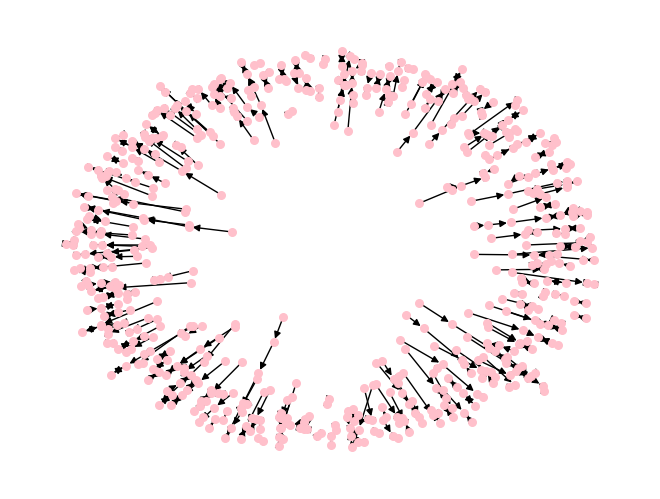

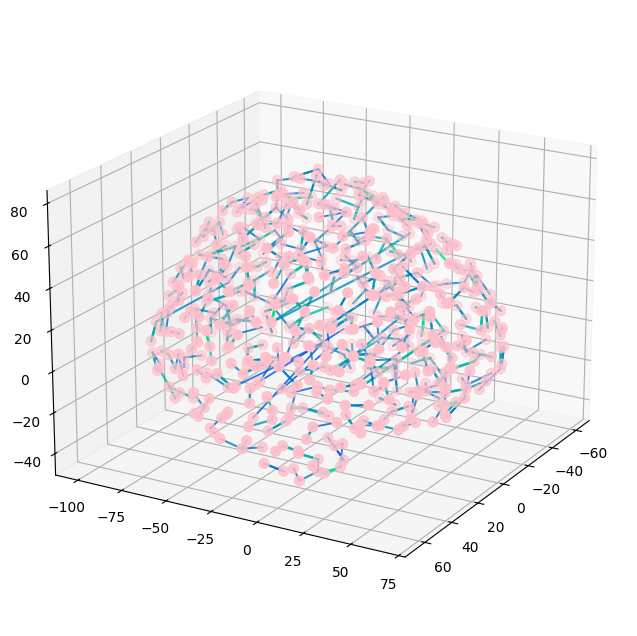

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io 
import networkx as nx
from matplotlib import cm

math_path = r"C:\Users\aliss\Documents\Repo_modelos\pythonProject\TAREAS\Coactivation_matrix.mat"
contents2 = scipy.io.loadmat(math_path)
mat_dict = {k: v for k, v in contents2.items() if k[0] != '_'}
df = pd.DataFrame(mat_dict["Coactivation_matrix"])

G = nx.from_pandas_adjacency(df, create_using=nx.DiGraph)

for node in G.nodes():
    edges = G[node]
    if edges:
        vmax = max(edges.items(), key=lambda x: x[1]['weight'])[0]
        for vecinos in list(edges.keys()):
            if vecinos != vmax:
                G.remove_edge(node, vecinos)


nx.draw(G, node_color="pink", edge_color="black", node_size=30)

df_adj = nx.to_pandas_adjacency(G)
adj_matrix = df_adj.to_numpy()

x = mat_dict['Coord'][:, 0]
y = mat_dict['Coord'][:, 1]
z = mat_dict['Coord'][:, 2]

peso_max = np.max(adj_matrix) if np.max(adj_matrix) > 0 else 1 
peso_norm = adj_matrix / peso_max 
colormap = cm.winter

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(x, y, z, color="pink", s=50)

for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix)):
        weight = adj_matrix[i, j]
        if weight > 0: 
            color = colormap(peso_norm[i, j]) 
            ax.plot(
                [x[i], x[j]],
                [y[i], y[j]],
                [z[i], z[j]],
                color=color, alpha=0.8, lw=1 + 3 * weight 
            )

ax.view_init(elev=20., azim=30)

plt.show()